# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


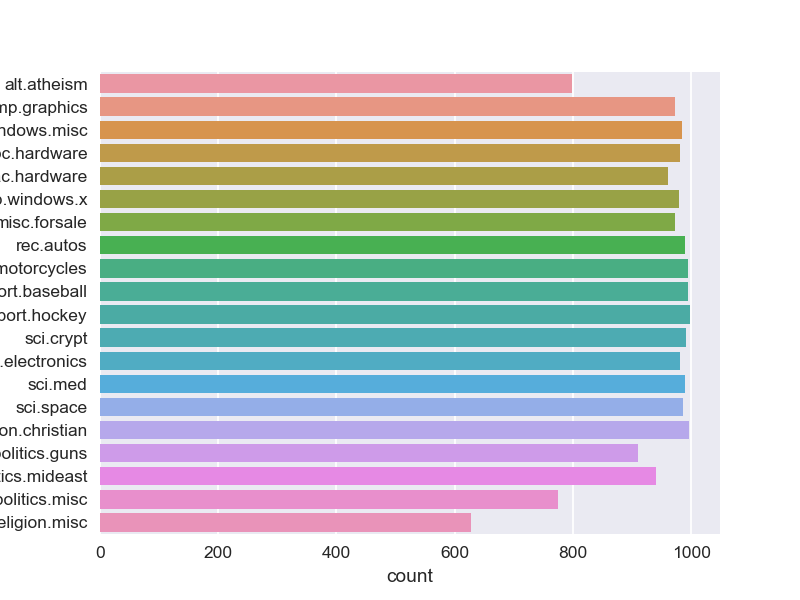

In [0]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [1]:
import pandas as pd
from tqdm import tqdm
import os
import re

In [57]:
filecontent_series = []
category_series = []
filenumber_series = []
for root, dirs, files in os.walk("./documents", topdown = False):
    for name in files:
        location = os.path.join(root, name)
        file_handle = open(location)
        data = file_handle.read()
        name = name.replace(".txt", "")
        filename = name.partition("_")
        #print(filename)
        category = filename[0]
        filenumber = filename[2]
        filecontent_series.append(data)
        category_series.append(category)
        filenumber_series.append(filenumber)
data_df = {"category":category_series, "filenumber":filenumber_series, "data":filecontent_series}
data_df = pd.DataFrame(data_df)
data_df.head()

,category,filenumber,data
0,alt.atheism,49960,From: mathew <mathew@mantis.co.uk>\nSubject: A...
1,alt.atheism,51060,From: mathew <mathew@mantis.co.uk>\nSubject: A...
2,alt.atheism,51119,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
3,alt.atheism,51120,From: mathew <mathew@mantis.co.uk>\nSubject: R...
4,alt.atheism,51121,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...


In [66]:
subject_list = []
preprocessed_email = []
cleaned_email_list = []
for index, row in tqdm(data_df.iterrows()):
    text = row["data"]
    emails = re.findall(r"[\w\.-]+@[\w\.-]+", text)
    output = [i.partition("@")[2] for i in emails]
    output = [i.split(".") for i in output]
    output = [item for sublist in output for item in sublist]
    output = [i for i in output if len(i)>2 and i!="com"]
    output = " ".join(output)
    preprocessed_email.append(output)
    for j in emails:
        text = text.replace(j, " ")
    email_subject_list = []
    for line in text.splitlines():
        if "Subject:" in line:
            text = text.replace(line, " ")
            data = re.sub(r"(.*)\:", "", line)
            data = re.sub(r"[^a-zA-Z0-9]+", " ", data)
            data = data.strip()
            email_subject_list.append(data)
    subject_list.append(email_subject_list)
    for line in text.splitlines():
        if "Write to:" in line:
            text = text.replace(line, " ")
        if "From:" in line:
            text = text.replace(line, " ")
    text = re.sub(r"\<(.*?)\>", "", text) #
    text = re.sub(r"\([^()]*\)", "", text) #
    text = text.replace("\n", " ")
    text = text.replace("\t", " ")
    text = text.replace("-", " ")
    text = text.replace("\\", " ")
    text = re.sub(r"\w+:\s?", "", text)
    text = decontract(text)
    text = remove_PERSON(text)
    text = " ".join(text)
    text = re.sub(r"[0-9]+", " ", text)
    text = text.replace("^_+","")
    clean = []
    for i in word_tokenize(text):
        if "_" in i:
            j = i.split("_")
            for k in reversed(j):
                if len(k)<=2:
                    j.remove(k)
            clean.append(j)
        else:
            clean.append(i)        
    clean = flatten_list(clean)
    text = " ".join(clean)
    text = " ".join([i.lower() for i in word_tokenize(text) if len(i)>2 and len(i)<15])
    text = re.sub(r"[^A-Za-z_]+", " ", text)
    cleaned_email_list.append(text)

#data_df.data = cleaned_email_list

5it [00:06,  1.38s/it]


In [5]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

['mantis netcom mantis',
 'mantis mantis mantis',
 'dbstu1 tu-bs mimsy umd edu umd edu',
 'mantis kepler unh edu',
 'Watson Ibm Com harder ccr-p ida org harder ccr-p ida org watson ibm',
 'dbstu1 tu-bs batman bmd trw batman bmd trw',
 'cco caltech edu jyusenkyou jhu edu',
 'dbstu1 tu-bs edu buphy edu',
 'cco caltech edu solntze wpd sgi',
 'cco caltech edu CWRU edu',
 'cco caltech edu solntze wpd sgi',
 'cco caltech edu newton apple',
 'cco caltech edu jyusenkyou jhu edu',
 'cco caltech edu vice ICO TEK COM',
 'cco caltech edu vice ICO TEK COM',
 'cco caltech edu vice ICO TEK COM',
 'vice ICO TEK COM psilink psilink vice ICO TEK COM',
 'vice ICO TEK COM monu6 monash edu yoyo monash edu vice ICO TEK COM',
 'vice ICO TEK COM blaze jhu edu jyusenkyou jhu edu fido asd sgi solntze wpd sgi vice ICO TEK COM',
 'pooh bears SUVM SYR EDU SUVM SYR EDU',
 'pooh bears jec322 its rpi edu MAINE MAINE EDU MAINE MAINE EDU',
 'bmers30 bnr mantis mantis bnr',
 'cco caltech edu solntze wpd sgi',
 'cco calt

In [6]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [2]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
from nltk.corpus import treebank_chunk
from nltk.chunk import ne_chunk
nltk.download('treebank')
nltk.download('words')
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk.tree import Tree

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NHegde163036\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\NHegde163036\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\NHegde163036\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\NHegde163036\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NHegde163036\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
subject_list = []
cleaned_email_list = []
for index, row in tqdm(data_df.iterrows()):
    text = row["data"]
    email_subject_list = []
    for line in text.splitlines():
        if "Subject:" in line:
            text = text.replace(line, " ")
            data = re.sub(r"(.*)\:", "", line)
            data = re.sub(r"[^a-zA-Z0-9]+", " ", data)
            data = data.strip()
            email_subject_list.append(data)
    """for subject_line in email_subject_list:
        text = text.replace(subject_line, "")"""
    subject_list.append(email_subject_list)
    cleaned_email_list.append(text)
data_df.data = cleaned_email_list

18828it [00:05, 3443.38it/s]


In [21]:
cleaned_email_list = []
for index, row in tqdm(data_df.iterrows()):
    text = row["data"]
    email_subject_list = []
    for line in text.splitlines():
        if "Write to:" in line:
            text = text.replace(line, " ")
        if "From:" in line:
            text = text.replace(line, " ")
    cleaned_email_list.append(text)
data_df.data = cleaned_email_list

18828it [00:04, 3903.83it/s]


In [3]:
def decontract(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [22]:
cleaned_email_list = []
for index, row in tqdm(data_df.iterrows()):
    text = row["data"]
    text = re.sub(r"\<(.*?)\>", "", text) #
    text = re.sub(r"\([^()]*\)", "", text) #
    text = text.replace("\n", "")
    text = text.replace("\t", "")
    text = text.replace("-", "")
    text = text.replace("\\", "")
    text = re.sub(r"\w+:\s?", "", text)
    text = decontract(text)
    cleaned_email_list.append(text)
data_df.data = cleaned_email_list

18828it [00:08, 2190.42it/s]


In [14]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

NameError: name 'chunks' is not defined

In [4]:
def get_entities(text):
    chunks = ne_chunk(pos_tag(word_tokenize(text)))
    print(chunks)
    entity_list = []
    chunk = []
    for i in chunks:
        if type(i) == Tree and i.label() != "PERSON":
            #print(type(i.leaves()))
            chunk.append("_".join([token for token, pos in i.leaves()]))
            #print(pos)
        if chunk:
            named_entity = " ".join(chunk)
            if named_entity not in entity_list:
                entity_list.append(named_entity)
                chunk = []
        else:
            continue
    return entity_list

In [5]:
def remove_PERSON(text):
    chunks = ne_chunk(pos_tag(word_tokenize(text)))
    entity_list = []
    chunk = []
    for i in chunks:
        if type(i) == Tree and i.label() != "PERSON":
            #print(type(i.leaves()))
            word = "_".join([token for token, pos in i.leaves()])
            chunk.append(word)
            #print(pos)
        if chunk:
            named_entity = " ".join(chunk)
            if named_entity not in entity_list:
                entity_list.append(named_entity)
                chunk = []
        if type(i) != Tree:  
            entity_list.append(i[0])
    return entity_list

In [119]:
cleaned_email_list = []
for index, row in tqdm(data_df.iterrows()):
    text = row["data"]
    text = remove_PERSON(text)
    text = " ".join(text)
    cleaned_email_list.append(text)
data_df.data = cleaned_email_list

18828it [40:26,  7.76it/s]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [35]:
def flatten_list(lst):
    final = []
    for i in lst:
        if isinstance(i, list): final.extend(flatten_list(i))
        else: final.append(i)
    return final

In [54]:
cleaned_email_list = []
for index, row in tqdm(data_df.iterrows()):    
    text =  row["data"]
    text = re.sub(r"[0-9]+", " ", text)
    text = text.replace("^_+","")
    clean = []
    for i in word_tokenize(text):
        if "_" in i:
            j = i.split("_")
            for k in reversed(j):
                if len(k)<=2:
                    j.remove(k)
            clean.append(j)
        else:
            clean.append(i)        
    clean = flatten_list(clean)
    text = " ".join(clean)
    text = " ".join([i.lower() for i in word_tokenize(text) if len(i)>2 and len(i)<15])
    text = re.sub(r"[^A-Za-z_]+", " ", text)
    cleaned_email_list.append(text)
data_df.data = cleaned_email_list

683it [00:08, 76.12it/s] 


TypeError: expected string or bytes-like object

In [55]:
data_df.iloc[683]

Unnamed: 0            683
category      alt.atheism
filenumber          53806
data                  NaN
Name: 683, dtype: object

In [53]:
text

'name nitya hegde from new york and work den morgan years old'

In [ ]:
data.columns

In [ ]:
data.iloc[400]

### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [68]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    text = Input_Text
    emails = re.findall(r"[\w\.-]+@[\w\.-]+", text)
    output = [i.partition("@")[2] for i in emails]
    output = [i.split(".") for i in output]
    output = [item for sublist in output for item in sublist]
    output = [i for i in output if len(i)>2 and i!="com"]
    preprocessed_email = " ".join(output)
    #preprocessed_email.append(output)
    for j in emails:
        text = text.replace(j, " ")
    email_subject_list = []
    for line in text.splitlines():
        if "Subject:" in line:
            text = text.replace(line, " ")
            data = re.sub(r"(.*)\:", "", line)
            data = re.sub(r"[^a-zA-Z0-9]+", " ", data)
            data = data.strip()
            email_subject_list.append(data)
    #subject_list.append(email_subject_list)
    for line in text.splitlines():
        if "Write to:" in line:
            text = text.replace(line, " ")
        if "From:" in line:
            text = text.replace(line, " ")
    text = re.sub(r"\<(.*?)\>", "", text) #
    text = re.sub(r"\([^()]*\)", "", text) #
    text = text.replace("\n", " ")
    text = text.replace("\t", " ")
    text = text.replace("-", " ")
    text = text.replace("\\", " ")
    text = re.sub(r"\w+:\s?", "", text)
    text = decontract(text)
    text = remove_PERSON(text)
    text = " ".join(text)
    text = re.sub(r"[0-9]+", " ", text)
    text = text.replace("^_+","")
    clean = []
    for i in word_tokenize(text):
        if "_" in i:
            j = i.split("_")
            for k in reversed(j):
                if len(k)<=2:
                    j.remove(k)
            clean.append(j)
        else:
            clean.append(i)        
    clean = flatten_list(clean)
    text = " ".join(clean)
    text = " ".join([i.lower() for i in word_tokenize(text) if len(i)>2 and len(i)<15])
    text = re.sub(r"[^A-Za-z_]+", " ", text)
    return (preprocessed_email,email_subject_list,text)

In [73]:
text = "Subject: Test Email \n My name_ is Nitya Hegde. I am _from de_New York d_and I _work_ in de_JP den_Morgan. I am 25 years old ansthqgstrqweradggsdj nitya@google.com "

In [75]:
op = preprocess(text)

In [77]:
%%time
preprocessed_email_list = []
for index, row in tqdm(data_df.iterrows()):
    text = row["data"]
    op = preprocess(text)
    preprocessed_email_list.append(op)

18828it [51:56,  6.04it/s]

Wall time: 51min 56s


In [96]:
preprocess(data_df.loc[(data_df.category == "alt.atheism")&(data_df.filenumber == "49960")]["data"][0])

('mantis netcom mantis',
 ['Atheist Resources'],
 'archive alt atheism archive resources last december atheist resources addresses atheist organizations usa freedom from religion foundation darwin fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation the evolution designs evolution designs sell the fish fish symbol like the ones christians stick their cars but with feet and the word written inside the deluxe moulded plastic fish postpaid the people the san francisco bay area can get from try mailing for net people who directly the price per fish american atheist press aap publish various atheist books critiques the bible lists biblical contradictions and one such book the bible handbook w p and g w american atheist press isbn edition bible contradictions absurdities atrocities immoralities contains ball the bible contradicts itself based the king version the aap bible austin prometheus books sell books including holy horro

In [100]:
data = data_df.rename(columns = {"data":"text","category":"class"})

In [102]:
data2 = pd.DataFrame.from_records(preprocessed_email_list, columns = ["preprocessed_email", "preprocessed_subject","preprocessed_text"])

In [108]:
data = pd.concat([data, data2], axis = 1)

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

In [131]:
model_df = pd.concat([data.preprocessed_text, data.preprocessed_subject, data.preprocessed_email])

In [134]:
model_df = model_df.reset_index(drop = True)

In [136]:
model_df

0        archive alt atheism archive resources last dec...
1        archive alt atheism archive introduction last ...
2        article well has quite different not necessari...
3        recently ras have been ordered post religious ...
4        article however hate economic terrorism and po...
                               ...                        
56479                 fraser sfu magnus acs ohio-state edu
56480    gtephx UUCP ifi uio ifi uio ncratl AtlantaGA N...
56481              quack kfu emx utexas edu emx utexas edu
56482    CUNYVM BITNET digi lonestar org digi lonestar org
56483    quack kfu darkside osrhe uoknor edu okcforum o...
Length: 56484, dtype: object

In [130]:
type_list = []
for i in tqdm(range(len(model_df))):
    if i<len(data):
        type_list.append("text")
    elif len(data)<=i<2*len(data):
        type_list.append("subject")
    else:
        type_list.append("email")

100%|████████████████████████████████████████████████████████████████████████| 56484/56484 [00:00<00:00, 124674.81it/s]


In [137]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(model_df, test_size = 0.25, stratify = type_list) 

In [140]:
data.to_csv("intermediate2.csv")

In [141]:
import torch

In [ ]:
model_input_data = pd.concat

In [165]:
final_train = []
for i in tqdm(train):
    if type(i)==list:
        j = i[0]
    else:
        j = i
    final_train.append(j)

100%|████████████████████████████████████████████████████████████████████████| 42363/42363 [00:00<00:00, 306983.01it/s]


In [168]:
final_train_tensor = torch.tensor(final_train[0])

TypeError: new(): invalid data type 'str'

In [169]:
torch.as_tensor(final_train)

ValueError: too many dimensions 'str'

In [170]:
from sklearn import preprocessing

In [173]:
le = preprocessing.LabelEncoder()
target = le.fit_transform(final_train_1)

In [174]:
target = torch.as_tensor(target)

In [183]:
padding_input = []
for i in tqdm(final_train_1):
    target = le.fit_transform(list(i))
    target = torch.as_tensor(target)
    padding_input.append(target)

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1249.87it/s]


In [184]:
padding_input

[tensor([ 1, 18, 20,  9,  3, 12,  5,  0, 13,  1, 20,  8,  5, 23,  0,  6,  1, 17,
          0,  3,  1, 14,  0, 14, 15, 20,  0, 18,  5, 13,  5, 13,  2,  5, 18,  0,
          8,  9, 19,  0, 12,  1, 19, 20,  0, 14,  1, 13,  5,  0, 11,  5,  9, 20,
          8,  0, 19,  9,  7,  0, 11,  5, 14, 20,  0,  6,  9, 14, 14,  0, 20,  1,
         19, 20,  9,  3,  0,  3,  9, 14,  4, 24,  0, 10,  9, 13,  0, 19,  9,  7,
          0, 19,  9, 13, 15, 14,  0, 20,  8,  1, 20,  0, 20,  8,  5,  9, 19, 20,
          0, 21, 13,  1, 18,  0, 18,  5,  1, 19, 15, 14,  1,  2, 12,  5,  0, 18,
         15,  2,  0,  1, 18,  7, 21,  5,  0, 23,  9, 20,  8,  0,  4,  1, 22,  5,
          0,  2, 21,  3, 11, 13,  9, 14, 19, 20,  5, 18,  0, 13,  1,  4,  4,  9,
          0, 14,  5, 22,  5, 18,  0, 21, 19,  5,  6, 21, 12,  0, 16, 15, 19, 20,
          0,  8,  5, 24,  0, 23,  8,  1, 20,  0,  1,  2, 15, 21, 20,  0,  1,  6,
          6,  5,  3, 20,  9, 15, 14,  1, 20,  5,  0, 14,  9,  3, 11, 14,  1, 13,
          5,  0,  6, 15, 18,

In [175]:
torch.nn.functional.pad(target,pad,mode = constant)

NameError: name 'pad' is not defined

In [186]:
padded_sequence = torch.nn.utils.rnn.pad_sequence(padding_input)

In [187]:
pip install tensorflow

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\NHegde163036\\Anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [172]:
final_train_1 = final_train[:10]

In [190]:
file = pd.read_csv("intermediate2.csv")

In [191]:
len(file)

18828

In [1]:
import tensorflow

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>